In [17]:
import numpy as np
from pandas import read_csv
import pandas_datareader.data as web
import matplotlib.pyplot as plt


In [18]:
doge = web.DataReader('DOGE-USD', 'yahoo')
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,0.001415,0.001181,0.001207,0.001415,6259550,0.001415
2017-11-10,0.001431,0.001125,0.001421,0.001163,4246520,0.001163
2017-11-11,0.001257,0.001141,0.001146,0.001201,2231080,0.001201
2017-11-12,0.001210,0.001002,0.001189,0.001038,3288960,0.001038
2017-11-13,0.001212,0.001019,0.001046,0.001211,2481270,0.001211
...,...,...,...,...,...,...
2022-05-11,0.110565,0.080036,0.108449,0.084581,2556008051,0.084581
2022-05-12,0.089028,0.070037,0.084636,0.082671,2631064083,0.082671
2022-05-13,0.094254,0.082371,0.082639,0.088331,1444350618,0.088331


In [19]:
#lstm_data = np.genfromtxt('./sample_data/lstm.csv', delimiter=',', skip_header=True)
lstm_data = read_csv('lstmdoge.csv')
lstm_data = lstm_data.drop(['Date'], axis=1)
print(lstm_data)

        High       Low      Open     Close      Volume  Adj Close  \
0   0.174406  0.168271  0.174406  0.170088   505900382   0.170088   
1   0.138747  0.135565  0.137213  0.137541   383506507   0.137541   
2   0.133649  0.127810  0.132998  0.129610   518193386   0.129610   
3   0.148558  0.137088  0.138903  0.146453  1047399132   0.146453   
4   0.131833  0.127399  0.130935  0.129520   555706527   0.129520   
..       ...       ...       ...       ...         ...        ...   
63  0.148559  0.141290  0.142557  0.144470   961074557   0.144470   
64  0.144643  0.134099  0.137376  0.135027  1555397213   0.135027   
65  0.144997  0.139880  0.144456  0.143210   884305263   0.143210   
66  0.136528  0.126239  0.135033  0.127557   916612071   0.127557   
67  0.147220  0.137172  0.143184  0.137826  1055136949   0.137826   

    Polarity Score  
0         0.095867  
1         0.146020  
2         0.138143  
3         0.146417  
4         0.134860  
..             ...  
63        0.114973  
64 

In [20]:
lstm_data_X = lstm_data.drop(['Close'], axis=1)
lstm_data_y = lstm_data['Close']

In [21]:
look_back = 5 # how many days to look back
batch_size = 3 # size of batches used when training
n_feat = 6 # number of features 
n_target = 2
n_validation = 6
n_test = 8
n_train = lstm_data_X.shape[0] - n_validation - n_test - 1


In [22]:
n_train

53

In [23]:
#lstm_data_X_train = lstm_data_X.iloc[:30,:]
#lstm_data_X_val = lstm_data_X.iloc[30:40,:]
#lstm_data_X_test = lstm_data_X.iloc[40:52,:]

#lstm_data_y_train = lstm_data_y.iloc[:30]
#lstm_data_y_val = lstm_data_y.iloc[30:40]
#lstm_data_y_test = lstm_data_y.iloc[40:52]
# Convert to numpy arrays
#X_train = lstm_data_X_train.to_numpy()
#X_val = lstm_data_X_val.to_numpy()
#X_test = lstm_data_X_test.to_numpy()
#y_train = lstm_data_y_train.to_numpy()
#y_val = lstm_data_y_val.to_numpy()
#y_test = lstm_data_y_test.to_numpy()

In [24]:
lstm_data_X_train = lstm_data_X.iloc[:n_train,:]
lstm_data_X_val = lstm_data_X.iloc[n_train:n_train + n_validation,:]
lstm_data_X_test = lstm_data_X.iloc[n_train + n_validation:n_train + n_validation + n_test,:]

lstm_data_y_train = lstm_data_y.iloc[:n_train]
lstm_data_y_val = lstm_data_y.iloc[n_train:n_train + n_validation]
lstm_data_y_test = lstm_data_y.iloc[n_train + n_validation:n_train + n_validation + n_test]
# Convert to numpy arrays
X_train = lstm_data_X_train.to_numpy()
X_val = lstm_data_X_val.to_numpy()
X_test = lstm_data_X_test.to_numpy()
y_train = lstm_data_y_train.to_numpy()
y_val = lstm_data_y_val.to_numpy()
y_test = lstm_data_y_test.to_numpy()

In [25]:
X_test

array([[1.45404994e-01, 1.36271998e-01, 1.37847006e-01, 1.76537097e+09,
        1.39699996e-01, 1.48283467e-01],
       [1.34479001e-01, 1.21954001e-01, 1.23117998e-01, 7.65755924e+08,
        1.33156002e-01, 1.31502325e-01],
       [1.52737007e-01, 1.42456993e-01, 1.44724995e-01, 1.47687551e+09,
        1.42656997e-01, 1.53586280e-01],
       [1.42618001e-01, 1.36058003e-01, 1.39690995e-01, 1.10513751e+09,
        1.37363002e-01, 1.28670540e-01],
       [1.48559004e-01, 1.41289994e-01, 1.42556995e-01, 9.61074557e+08,
        1.44470006e-01, 1.14973180e-01],
       [1.44642994e-01, 1.34099007e-01, 1.37375996e-01, 1.55539721e+09,
        1.35027006e-01, 1.31015680e-01],
       [1.44997001e-01, 1.39880002e-01, 1.44455999e-01, 8.84305263e+08,
        1.43209994e-01, 1.07060620e-01],
       [1.36528000e-01, 1.26239002e-01, 1.35032997e-01, 9.16612071e+08,
        1.27556995e-01, 1.41039940e-01]])

In [26]:
y_test

array([0.1397    , 0.133156  , 0.142657  , 0.137363  , 0.14447001,
       0.13502701, 0.14320999, 0.12755699])

In [27]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, ThresholdedReLU, MaxPooling2D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# Load the TensorBoard notebook extension.
%load_ext tensorboard
from datetime import datetime


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [28]:
train_data_gen = TimeseriesGenerator(X_train, y_train, length=look_back, batch_size=batch_size)
val_data_gen = TimeseriesGenerator(X_val, y_val, length=look_back, batch_size=batch_size)
test_data_gen = TimeseriesGenerator(X_test, y_test, length=look_back, batch_size=batch_size)

In [29]:
# check generator dimensions
for i in range(len(train_data_gen)):
    x, y = train_data_gen[i]
    print(x.shape, y.shape)

(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)


In [30]:
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(look_back, n_feat), return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss='mse', metrics=["mse"])
print(model_lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 32)             4992      
                                                                 
 dropout_2 (Dropout)         (None, 5, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,345
Trainable params: 13,345
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
hist = model_lstm.fit_generator(train_data_gen,
                                        steps_per_epoch=10,
                                        epochs=30,
                                        verbose=1,
                                        validation_data=val_data_gen, #training put a graph of traing loss and val loss
                                        callbacks=[tensorboard_callback])


Epoch 1/30


C:\Users\moham\AppData\Local\Temp/ipykernel_13368/531576743.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_lstm.fit_generator(train_data_gen,


10/10 [==============================] - 4s 101ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 6.4352e-04 - val_mse: 6.4352e-04
Epoch 2/30
10/10 [==============================] - 0s 16ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 8.8279e-04 - val_mse: 8.8279e-04
Epoch 3/30
10/10 [==============================] - 0s 15ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 2.0397e-04 - val_mse: 2.0397e-04
Epoch 4/30
10/10 [==============================] - 0s 15ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 5/30
10/10 [==============================] - 0s 16ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 9.7832e-04 - val_mse: 9.7832e-04
Epoch 6/30
10/10 [==============================] - 0s 16ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 1.2924e-04 - val_mse: 1.2924e-04
Epoch 7/30
10/10 [==============================] - 0s 15ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 1.6017e-05 - val_mse: 1.6017e-05
Epoch 8/30
10/10 [===========================

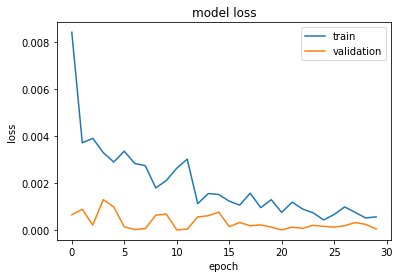

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [33]:
pred = model_lstm.predict(test_data_gen)

In [34]:
test_data_gen[0]

(array([[[1.45404994e-01, 1.36271998e-01, 1.37847006e-01, 1.76537097e+09,
          1.39699996e-01, 1.48283467e-01],
         [1.34479001e-01, 1.21954001e-01, 1.23117998e-01, 7.65755924e+08,
          1.33156002e-01, 1.31502325e-01],
         [1.52737007e-01, 1.42456993e-01, 1.44724995e-01, 1.47687551e+09,
          1.42656997e-01, 1.53586280e-01],
         [1.42618001e-01, 1.36058003e-01, 1.39690995e-01, 1.10513751e+09,
          1.37363002e-01, 1.28670540e-01],
         [1.48559004e-01, 1.41289994e-01, 1.42556995e-01, 9.61074557e+08,
          1.44470006e-01, 1.14973180e-01]],
 
        [[1.34479001e-01, 1.21954001e-01, 1.23117998e-01, 7.65755924e+08,
          1.33156002e-01, 1.31502325e-01],
         [1.52737007e-01, 1.42456993e-01, 1.44724995e-01, 1.47687551e+09,
          1.42656997e-01, 1.53586280e-01],
         [1.42618001e-01, 1.36058003e-01, 1.39690995e-01, 1.10513751e+09,
          1.37363002e-01, 1.28670540e-01],
         [1.48559004e-01, 1.41289994e-01, 1.42556995e-01, 9.6

In [35]:
pred

array([[0.13813335],
       [0.13813335],
       [0.13813335]], dtype=float32)

In [36]:
import matplotlib.pyplot as plt

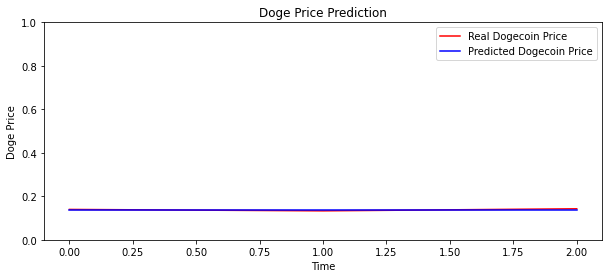

In [37]:
# Visualising the results
plt.figure(figsize=(10,4))
plt.plot(y_test[0:y_test.shape[0]-5], color = 'red', label = 'Real Dogecoin Price')
plt.plot(pred, color = 'blue', label = 'Predicted Dogecoin Price')
plt.title('Doge Price Prediction')
plt.xlabel('Time')
plt.ylabel('Doge Price')
plt.ylim(0,1)
plt.legend()
plt.show()

In [38]:
# on cmd promt, you should use the function below to kill the tensorboard 
#taskkill /im tensorboard.exe /f
#del /q %TMP%\.tensorboard-info\*#

In [39]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 2592), started 1 day, 6:29:08 ago. (Use '!kill 2592' to kill it.)